# Bài tập thực hành

1. Cho 1 phân bố gamma về số tuổi của 1 quần thể dân cư (100000 người) có tuổi trung bình của quần thể là 18.
    - Ước tính tuổi trung bình của quần thể mà không cần lấy mẫu hết toàn bộ 100000 người.
    - Khoảng tin cậy là 95%, độ tuổi trung bình sẽ nằm trong khoảng giá trị bao nhiêu?
2. Thực hiện lại bài tập phân tích mô tả trên tập dữ liệu giá nhà bằng cách điền vào code còn trống (TODO).
3. Áp dụng lý thuyết CLT để tính giá trị trung bình của `SalePrice` (tập dữ liệu giá nhà) chỉ sử dụng 400 mẫu.

## Bài 1. CLT, CI

In [70]:
import numpy as np
from matplotlib import pyplot as plt
import scipy.special as sps

%matplotlib inline
np.random.seed(100)

In [71]:
SAMPLE_SIZE = 100

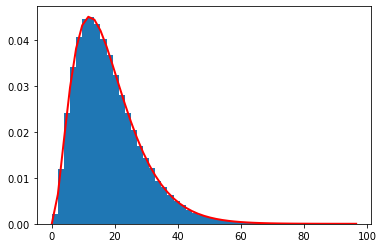

In [72]:
# random gamma distribution
shape, scale = 3, 6.  # mean=18, std=9*sqrt(2)
population = np.random.gamma(shape, scale, 100000)
  
count, bins, ignored = plt.hist(population, 50, density=True)
y = bins**(shape-1)*(np.exp(-bins/scale) /  
                     (sps.gamma(shape)*scale**shape))
plt.plot(bins, y, linewidth=2, color='r')
plt.show()

In [73]:
num_trials = 1000
mean = 0

# TODO: tính mean của quẩn thể `population` áp dụng CLT
# Tăng dần `num_trials` và quan sát kết quả

print(f'Mean of sampling distribution: {mean}')

Mean of sampling distribution: 0


In [74]:
print(np.mean(population))
print(np.percentile(population,[2.5,97.5]))

18.035090574210187
[ 3.75575369 43.17442422]


### Ước tính tuổi trung bình của quần thể mà không cần lấy mẫu hết toàn bộ 100000 người.

In [75]:
def mean_sample(x,y):
    n = np.random.randint(x,y)
    print(f"Number of samples in this sample: {n}")
    sample = np.random.choice(population, n)
    print(f"Mean of sample {np.mean(sample)}")
    print(f"CI 95% of sample {np.percentile(sample,[2.5,97.5])}\n")

In [76]:
mean_sample(30,60)
mean_sample(120,150)
mean_sample(300,330)
mean_sample(660,690)
mean_sample(1400,1500)

Number of samples in this sample: 48
Mean of sample 18.218974502216017
CI 95% of sample [ 5.51008396 37.87249787]

Number of samples in this sample: 126
Mean of sample 17.903305826764164
CI 95% of sample [ 3.78531385 37.41671568]

Number of samples in this sample: 318
Mean of sample 18.028245988739194
CI 95% of sample [ 3.46485372 44.00262533]

Number of samples in this sample: 682
Mean of sample 18.396027503173364
CI 95% of sample [ 3.98097025 43.35922236]

Number of samples in this sample: 1447
Mean of sample 17.321904753671596
CI 95% of sample [ 3.67530383 42.29779862]



## Bài 2. Phân tích mô tả

In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [78]:
hprice_df = pd.read_csv('house_price.csv')
hprice_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [79]:
# Bỏ các cột không cần thiết
cols_to_drop = ['Id']
hprice_df = hprice_df.drop(cols_to_drop, axis=1)

In [80]:
hprice_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

### Phân tích tương quan các đặc trưng với `SalePrice`
- Phân tích sự tương quan của các biến đặc trưng (feature) với biến mục tiêu (target)

#### Đặc trưng có giá trị kiểu số (numeric variable)
- Phân tích tương quan giữa `SalePrice` và các đặc trưng: `TotalBsmtSF`, `PoolArea`, `GarageCars`, `OverallQual`, `YearBuilt`
  * Tính correlation
  * Vẽ biểu đồ thể hiện sự tương quan

In [81]:
# TODO
hprice_df['SalePrice'].dtypes

dtype('int64')

In [82]:
hprice_df['TotalBsmtSF'].dtypes

dtype('int64')

Text(0.5, 1.0, 'Correlation between SalePrice and TotalBsmtSF: 0.6136')

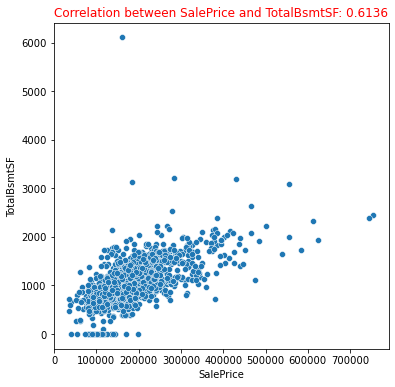

In [83]:
fig, ax = plt.subplots(1, 1, figsize=(6,6))
ax = sns.scatterplot(x='SalePrice', y='TotalBsmtSF', data=hprice_df, ax=ax)
title = f"Correlation between SalePrice and TotalBsmtSF: {np.round(hprice_df['SalePrice'].corr(hprice_df['TotalBsmtSF']),4)}"
ax.set_title(title, color='r')

In [84]:
hprice_df['PoolArea'].dtypes

dtype('int64')

Text(0.5, 1.0, 'Correlation between SalePrice and PoolArea: 0.0924')

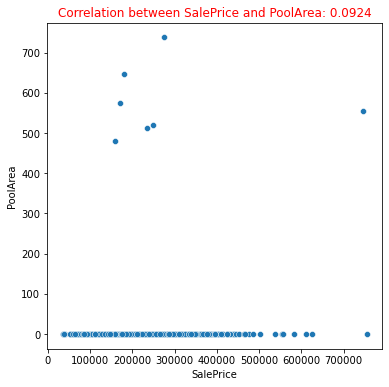

In [85]:
fig, ax = plt.subplots(1, 1, figsize=(6,6))
ax = sns.scatterplot(x='SalePrice', y='PoolArea', data=hprice_df, ax=ax)
title = f"Correlation between SalePrice and PoolArea: {np.round(hprice_df['SalePrice'].corr(hprice_df['PoolArea']),4)}"
ax.set_title(title, color='r')

In [86]:
hprice_df['GarageCars'].dtypes

dtype('int64')

Text(0.5, 1.0, 'Correlation between SalePrice and GarageCars: 0.6404')

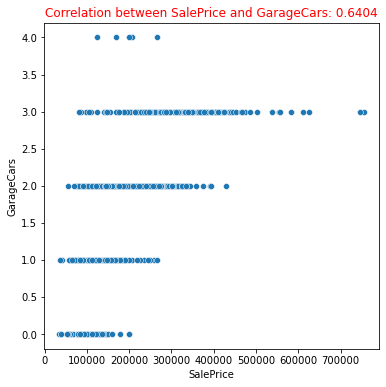

In [87]:
fig, ax = plt.subplots(1, 1, figsize=(6,6))
ax = sns.scatterplot(x='SalePrice', y='GarageCars', data=hprice_df, ax=ax)
title = f"Correlation between SalePrice and GarageCars: {np.round(hprice_df['SalePrice'].corr(hprice_df['GarageCars']),4)}"
ax.set_title(title, color='r')

In [88]:
hprice_df['OverallQual'].dtypes

dtype('int64')

Text(0.5, 1.0, 'Correlation between SalePrice and OverallQual: 0.791')

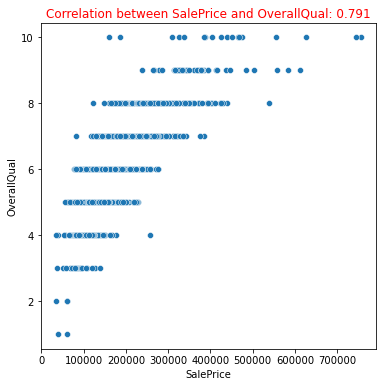

In [89]:
fig, ax = plt.subplots(1,1,figsize=(6,6))
ax = sns.scatterplot(x='SalePrice', y='OverallQual', data=hprice_df, ax=ax)
title = f"Correlation between SalePrice and OverallQual: {np.round(hprice_df['SalePrice'].corr(hprice_df['OverallQual']),4)}"
ax.set_title(title, color='r')

In [90]:
hprice_df['YearBuilt'].dtypes

dtype('int64')

Text(0.5, 1.0, 'Correlation between SalePrice and YearBuilt: 0.5229')

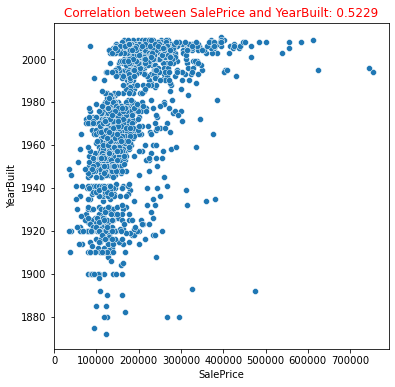

In [91]:
fig, ax = plt.subplots(1,1,figsize=(6,6))
ax = sns.scatterplot(x='SalePrice', y='YearBuilt', data=hprice_df, ax=ax)
title = f"Correlation between SalePrice and YearBuilt: {np.round(hprice_df['SalePrice'].corr(hprice_df['YearBuilt']),4)}"
ax.set_title(title, color='r')

#### Heatmap
- Vẽ biểu đồ heatmap, phân tích sự tương quan giữa các đặc trưng với nhau và với `SalePrice`

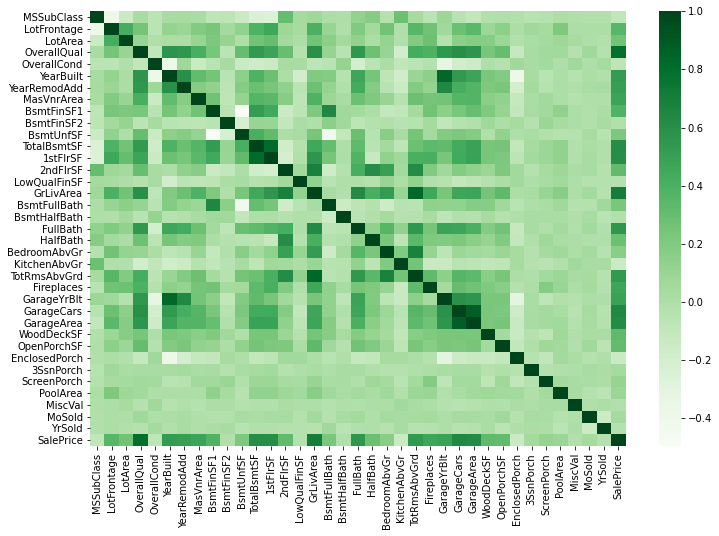

In [92]:
corr_mat = hprice_df.corr()
fig, ax = plt.subplots(1,1,figsize=(12,8))
ax = sns.heatmap(corr_mat, ax=ax, cmap='Greens')

**Pairplot**
- Vẽ pairplot `SalePrice`và các đặc trưng có hệ số tương quan với `SalePrice` trên 0.6.

In [93]:
corr_above6 = pd.DataFrame(corr_mat['SalePrice'][corr_mat['SalePrice']>0.6])
corr_above6.columns = ['SalePrice']
corr_above6

,SalePrice
OverallQual,0.790982
TotalBsmtSF,0.613581
1stFlrSF,0.605852
GrLivArea,0.708624
GarageCars,0.640409
GarageArea,0.623431
SalePrice,1.000000


Text(0.5, 1.0, 'Correlation between features and SalePrice that above 0.6')

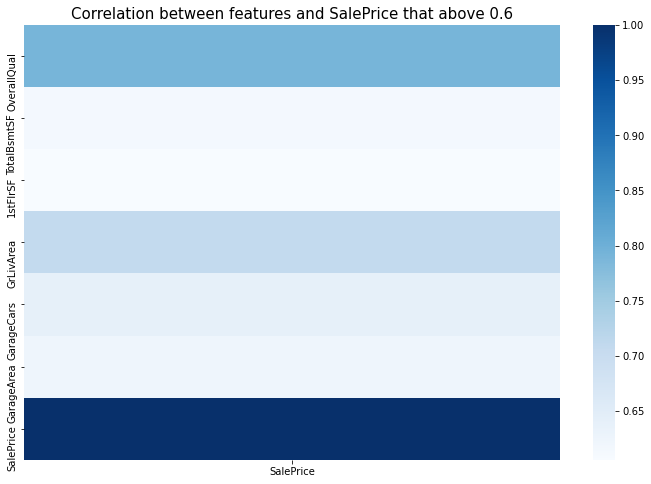

In [94]:
fig, ax = plt.subplots(1,1,figsize=(12,8))
ax = sns.heatmap(corr_above6, ax=ax, cmap='Blues')
ax.set_title('Correlation between features and SalePrice that above 0.6', size=15)

In [95]:
cols = list(corr_above6.index[:])


### Xử lý dữ liệu thiếu

In [96]:
hprice_df = pd.read_csv('house_price.csv')
hprice_df.head()
miss = hprice_df.isna().sum()
miss = miss[miss>0]
print('Danh sách các cột thiếu dữ liệu:\n')
print(miss)
print('\n\nSố lượng cột có dữ liệu thiếu:', len(miss))

Danh sách các cột thiếu dữ liệu:

LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64


Số lượng cột có dữ liệu thiếu: 19


#### Nhóm Bsmt 

In [97]:
bsmt_na = [col for col in hprice_df.columns if 'Bsmt' in col]
print(bsmt_na)

bsmt_na = set(bsmt_na).intersection(set(miss.index.tolist()))
bsmt_na = list(bsmt_na)
bsmt_na

['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath']


['BsmtExposure', 'BsmtCond', 'BsmtFinType1', 'BsmtQual', 'BsmtFinType2']

In [98]:
for bsmt_type in bsmt_na:
    if hprice_df[bsmt_type].dtypes == 'object':
        print(bsmt_type)

BsmtExposure
BsmtCond
BsmtFinType1
BsmtQual
BsmtFinType2


In [99]:
for bsmt_type in bsmt_na:
    if hprice_df[bsmt_type].dtypes == 'object':
        print('Kiểu loại:', bsmt_type)
        hprice_df[bsmt_type] = hprice_df[bsmt_type].where(hprice_df[bsmt_type].isna() == False, 'NA')
    else:
        print('Kiểu số:', bsmt_type)
        hprice_df[bsmt_type] = hprice_df[bsmt_type].where(hprice_df[bsmt_type].isna() == False, 0)

Kiểu loại: BsmtExposure
Kiểu loại: BsmtCond
Kiểu loại: BsmtFinType1
Kiểu loại: BsmtQual
Kiểu loại: BsmtFinType2


#### Nhóm garage - TODO

In [100]:
#TODO
len(hprice_df['BsmtCond'][hprice_df['BsmtCond'].isna()==False])

1460

In [101]:
len(hprice_df['BsmtCond'][hprice_df['BsmtCond'].isna()==True])

0

In [102]:
garage_na = [col for col in hprice_df.columns if 'Garage' in col]
print(garage_na)

garage_na = set(garage_na).intersection(set(miss.index.tolist()))
garage_na = list(garage_na)
print(garage_na)

['GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond']
['GarageCond', 'GarageYrBlt', 'GarageType', 'GarageFinish', 'GarageQual']


In [103]:
for garage_type in garage_na:
    if hprice_df[garage_type].dtypes == 'object':
        print('Oject type:', garage_type)
        hprice_df[garage_type] = hprice_df[garage_type].where(hprice_df[garage_type].isna()==False, 'NA')
    else:
        print('Number type:', garage_type)
        hprice_df[garage_type] = hprice_df[garage_type].where(hprice_df[garage_type].isna()==False, 0)
        
len(hprice_df['GarageCond'][hprice_df['GarageCond'].isna()==True])

Oject type: GarageCond
Number type: GarageYrBlt
Oject type: GarageType
Oject type: GarageFinish
Oject type: GarageQual


0

In [104]:
hprice_df.columns[hprice_df.isna().sum() > 0]


Index(['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'Electrical',
       'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature'],
      dtype='object')

In [105]:
hprice_df['SaleType'].isna().sum()

0

#### Các cột còn lại - TODO

In [106]:
# MSZoning: điền giá trị mode
hprice_df['MSZoning'].fillna(hprice_df['MSZoning'].mode()[0], inplace=True)

# LotFrontage: điền giá trị trung vị của neighborhood
hprice_df['LotFrontage'] = hprice_df.groupby('Neighborhood')['LotFrontage'].transform(lambda x: x.fillna(x.median()))

# 'MiscFeature', 'Fence', 'Alley', 'PoolQC': điền giá trị NA
cols_fill_na = ['MiscFeature', 'Fence', 'Alley', 'PoolQC', 'FireplaceQu']
for col in cols_fill_na:
    hprice_df[col].fillna('NA', inplace=True)

# MasVnrType and MasVnrArea: NA và 0
hprice_df['MasVnrType'].fillna('NA', inplace=True)
hprice_df['MasVnrArea'].fillna(0.0, inplace=True)

# phần còn lại điền vào giá trị mode
cols_fill_mode = ['KitchenQual', 'Utilities', 'Functional',
                'Exterior1st', 'Exterior2nd', 'Electrical', 'SaleType']

#TODO
hprice_df['Electrical'].fillna(hprice_df['Electrical'].mode()[0], inplace=True)

#### Kiểm tra lại

In [107]:
# double check
hprice_df.columns[hprice_df.isna().sum() > 0]

## Output đúng: Index([], dtype='object')

Index([], dtype='object')

### Tiền xử lý và chuẩn hóa dữ liệu
- Tính skewness/kurtosis và thực hiện transform cho các đặc trưng: `GrLivArea`, `TotalBsmtSF`, `LotFrontage`, `1stFlrSF`, `MiscVal`
- Gợi ý: `numpy.log, numpy.log1p, numpy.boxcox, numpy.boxcox1p`.

In [108]:
# TODO
from scipy.special import boxcox1p, boxcox
from scipy.stats import norm, skew
from scipy import stats
hprice = hprice_df.copy()
def skew_kurt(x):
    print(f"Data type of {x} is {hprice[x].dtypes}")
    print(f"Skewness of {x} is {np.round(hprice[x].skew(),4)}")
    print(f"Kurtosis of {x} is {np.round(hprice[x].kurtosis(),4)}")

In [109]:
skew_kurt('GrLivArea')
hprice['GrLivArea']

Data type of GrLivArea is int64
Skewness of GrLivArea is 1.3666
Kurtosis of GrLivArea is 4.8951


0       1710
1       1262
2       1786
3       1717
4       2198
        ... 
1455    1647
1456    2073
1457    2340
1458    1078
1459    1256
Name: GrLivArea, Length: 1460, dtype: int64

#### GrLivArea 

Data type of GrLivArea is float64
Skewness of GrLivArea is -0.007
Kurtosis of GrLivArea is 0.2826


C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


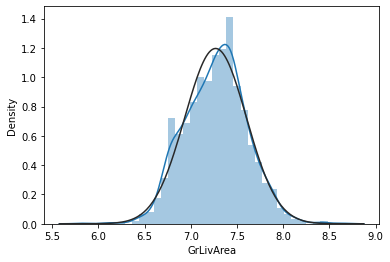

In [110]:
hprice['GrLivArea'] = np.log(hprice['GrLivArea'])
sns.distplot(hprice['GrLivArea'],fit=norm)
skew_kurt('GrLivArea')
plt.show()

#### TotalBsmtSF 

In [111]:
hprice = hprice_df.copy()
hprice['TotalBsmtSF'][hprice['TotalBsmtSF']==0].count()

37

Data type of TotalBsmtSF is float64
Skewness of TotalBsmtSF is -0.571
Kurtosis of TotalBsmtSF is 4.9439


C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


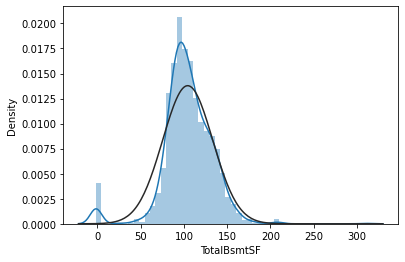

In [112]:
hprice = hprice_df.copy()
hprice['TotalBsmtSF'] = boxcox(hprice['TotalBsmtSF'],0.6)
sns.distplot(hprice['TotalBsmtSF'],fit=norm)
skew_kurt('TotalBsmtSF')
plt.show()

Data type of TotalBsmtSF is float64
Skewness of TotalBsmtSF is 0.4113
Kurtosis of TotalBsmtSF is 1.9522


C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


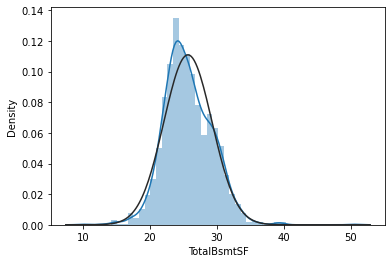

In [113]:
# Continue normalize with box cox 2 times more and i got this result
hprice['TotalBsmtSF'] = boxcox(hprice['TotalBsmtSF'],0.6)
sns.distplot(hprice['TotalBsmtSF'],fit=norm)
skew_kurt('TotalBsmtSF')
plt.show()

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Data type of TotalBsmtSF is float64
Skewness of TotalBsmtSF is -5.1547
Kurtosis of TotalBsmtSF is 27.7397


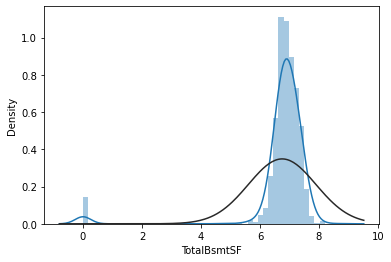

In [114]:
# Normalize with np.log
hprice = hprice_df.copy()
hprice['TotalBsmtSF'] = np.log1p(hprice['TotalBsmtSF'])
sns.distplot(hprice['TotalBsmtSF'],fit=norm)
skew_kurt('TotalBsmtSF')
plt.show()

 ###### => boxcox is better for TotalBsmtSF

#### LotFrontage 

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Data type of LotFrontage is float64
Skewness of LotFrontage is -0.9459
Kurtosis of LotFrontage is 3.1986


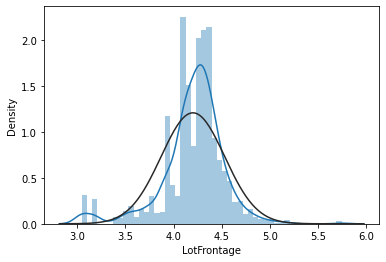

In [115]:
hprice = hprice_df.copy()
hprice['LotFrontage'] = np.log(hprice['LotFrontage'])
sns.distplot(hprice['LotFrontage'],fit=norm)
skew_kurt('LotFrontage')
plt.show()

##### => boxcox and np.log have equal efficiency 

#### 1stFlrSF 

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Data type of 1stFlrSF is int64
Skewness of 1stFlrSF is 1.3768
Kurtosis of 1stFlrSF is 5.7458


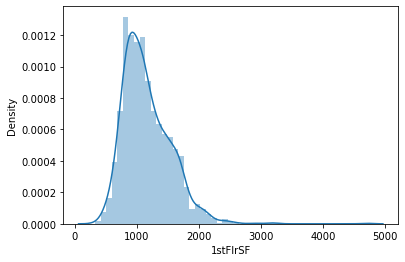

In [116]:
hprice = hprice_df.copy()
sns.distplot(hprice['1stFlrSF'], kde=True)
skew_kurt('1stFlrSF')

Data type of 1stFlrSF is float64
Skewness of 1stFlrSF is 0.0792
Kurtosis of 1stFlrSF is 0.1508


C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


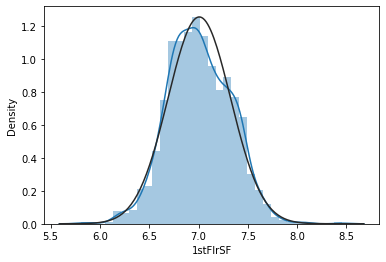

In [117]:
hprice = hprice_df.copy()
hprice['1stFlrSF'] = np.log(hprice['1stFlrSF'])
sns.distplot(hprice['1stFlrSF'],fit=norm)
skew_kurt('1stFlrSF')
plt.show()

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Data type of 1stFlrSF is float64
Skewness of 1stFlrSF is -0.0355
Kurtosis of 1stFlrSF is 0.151


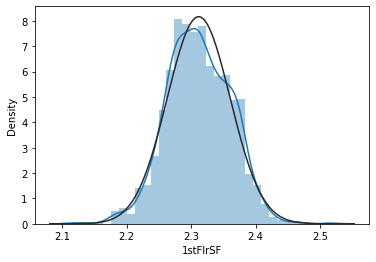

In [118]:
# hprice = hprice_df.copy()
hprice['1stFlrSF'] = boxcox1p(hprice['1stFlrSF'],0.1) # running boxcox transform 2 times to get this result
sns.distplot(hprice['1stFlrSF'],fit=norm)
skew_kurt('1stFlrSF')
plt.show()

#### MiscVal 

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Data type of MiscVal is int64
Skewness of MiscVal is 24.4768
Kurtosis of MiscVal is 701.0033


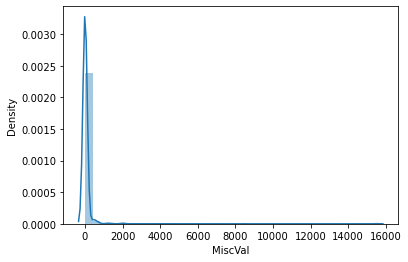

In [119]:
hprice = hprice_df.copy()
sns.distplot(hprice['MiscVal'], kde=True)
skew_kurt('MiscVal')

In [120]:
# Can't use np.log because has none value
hprice = hprice_df.copy()
print(len(hprice['MiscVal']))
hprice['MiscVal'][hprice['MiscVal']==0].count()

1460


1408

Data type of MiscVal is float64
Skewness of MiscVal is 5.1707
Kurtosis of MiscVal is 25.4386


C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


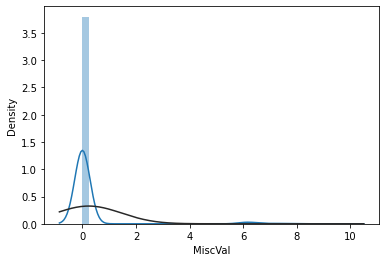

In [121]:
hprice = hprice_df.copy()
hprice['MiscVal'] = np.log1p(hprice['MiscVal'])
sns.distplot(hprice['MiscVal'],fit=norm)
skew_kurt('MiscVal')
plt.show()

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Data type of MiscVal is float64
Skewness of MiscVal is 5.3543
Kurtosis of MiscVal is 28.4011
1408


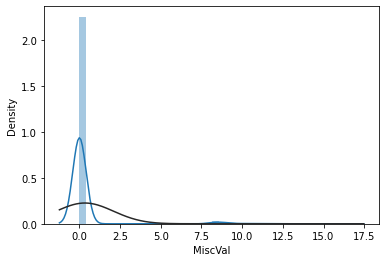

In [122]:
hprice = hprice_df.copy()
hprice['MiscVal'] = boxcox1p(hprice['MiscVal'],0.1)
sns.distplot(hprice['MiscVal'],fit=norm)
skew_kurt('MiscVal')
print(hprice['MiscVal'][hprice['MiscVal']==0].count())
plt.show()

### LabelEncode và OneHotEncoding
- Thực hiện LabelEncoding cho các đặc trưng có tính thứ tự (như liên quan đến chất lượng,..) và OneHotEncoding cho các đặc trưng còn lại.

#### Label Encoding

In [123]:
from sklearn.preprocessing import LabelEncoder

# TODO

In [124]:
hprice_df['BsmtQual'].unique()

array(['Gd', 'TA', 'Ex', 'NA', 'Fa'], dtype=object)

In [125]:
cols = ('FireplaceQu', 'BsmtQual', 'BsmtCond', 'GarageQual', 'GarageCond', 
        'ExterQual', 'ExterCond','HeatingQC', 'PoolQC', 'KitchenQual', 'BsmtFinType1', 
        'BsmtFinType2', 'Functional', 'Fence', 'BsmtExposure', 'GarageFinish', 'LandSlope',
        'LotShape', 'PavedDrive', 'Street', 'Alley', 'CentralAir', 'MSSubClass', 'OverallCond')
#         'YrSold', 'MoSold')
# process columns, apply LabelEncoder to categorical features
for c in cols:
    print(c,hprice_df[c].unique(),'\n')
# shape        
print('Shape all_data: {}'.format(hprice_df.shape))

FireplaceQu ['NA' 'TA' 'Gd' 'Fa' 'Ex' 'Po'] 

BsmtQual ['Gd' 'TA' 'Ex' 'NA' 'Fa'] 

BsmtCond ['TA' 'Gd' 'NA' 'Fa' 'Po'] 

GarageQual ['TA' 'Fa' 'Gd' 'NA' 'Ex' 'Po'] 

GarageCond ['TA' 'Fa' 'NA' 'Gd' 'Po' 'Ex'] 

ExterQual ['Gd' 'TA' 'Ex' 'Fa'] 

ExterCond ['TA' 'Gd' 'Fa' 'Po' 'Ex'] 

HeatingQC ['Ex' 'Gd' 'TA' 'Fa' 'Po'] 

PoolQC ['NA' 'Ex' 'Fa' 'Gd'] 

KitchenQual ['Gd' 'TA' 'Ex' 'Fa'] 

BsmtFinType1 ['GLQ' 'ALQ' 'Unf' 'Rec' 'BLQ' 'NA' 'LwQ'] 

BsmtFinType2 ['Unf' 'BLQ' 'NA' 'ALQ' 'Rec' 'LwQ' 'GLQ'] 

Functional ['Typ' 'Min1' 'Maj1' 'Min2' 'Mod' 'Maj2' 'Sev'] 

Fence ['NA' 'MnPrv' 'GdWo' 'GdPrv' 'MnWw'] 

BsmtExposure ['No' 'Gd' 'Mn' 'Av' 'NA'] 

GarageFinish ['RFn' 'Unf' 'Fin' 'NA'] 

LandSlope ['Gtl' 'Mod' 'Sev'] 

LotShape ['Reg' 'IR1' 'IR2' 'IR3'] 

PavedDrive ['Y' 'N' 'P'] 

Street ['Pave' 'Grvl'] 

Alley ['NA' 'Grvl' 'Pave'] 

CentralAir ['Y' 'N'] 

MSSubClass [ 60  20  70  50 190  45  90 120  30  85  80 160  75 180  40] 

OverallCond [5 8 6 7 4 2 3 9 1] 

Shape all_data: (1460, 

In [126]:
cols = ('FireplaceQu', 'BsmtQual', 'BsmtCond', 'GarageQual', 'GarageCond', 
        'ExterQual', 'ExterCond','HeatingQC', 'PoolQC', 'KitchenQual', 'BsmtFinType1', 
        'BsmtFinType2', 'Functional', 'Fence', 'BsmtExposure', 'GarageFinish', 'LandSlope',
        'LotShape', 'PavedDrive', 'Street', 'Alley', 'CentralAir', 'MSSubClass', 'OverallCond')
#         'YrSold', 'MoSold')
# process columns, apply LabelEncoder to categorical features
for c in cols:
    lbl = LabelEncoder() 
    hprice_df[c] = lbl.fit_transform(hprice_df[c])

# shape        
print('Shape all_data: {}'.format(hprice_df.shape))

Shape all_data: (1460, 81)


In [127]:
for c in cols:
    print(c,hprice_df[c].unique(),'\n')
# shape        
print('Shape all_data: {}'.format(hprice_df.shape)) 

FireplaceQu [3 5 2 1 0 4] 

BsmtQual [2 4 0 3 1] 

BsmtCond [4 1 2 0 3] 

GarageQual [5 1 2 3 0 4] 

GarageCond [5 1 3 2 4 0] 

ExterQual [2 3 0 1] 

ExterCond [4 2 1 3 0] 

HeatingQC [0 2 4 1 3] 

PoolQC [3 0 1 2] 

KitchenQual [2 3 0 1] 

BsmtFinType1 [2 0 6 5 1 4 3] 

BsmtFinType2 [6 1 4 0 5 3 2] 

Functional [6 2 0 3 4 1 5] 

Fence [4 2 1 0 3] 

BsmtExposure [4 1 2 0 3] 

GarageFinish [2 3 0 1] 

LandSlope [0 1 2] 

LotShape [3 0 1 2] 

PavedDrive [2 0 1] 

Street [1 0] 

Alley [1 0 2] 

CentralAir [1 0] 

MSSubClass [ 5  0  6  4 14  3 10 11  1  9  8 12  7 13  2] 

OverallCond [4 7 5 6 3 1 2 8 0] 

Shape all_data: (1460, 81)


#### OneHot Encoding

In [128]:
from sklearn.preprocessing import OneHotEncoder

In [129]:
# TODO
cols = {'FireplaceQu', 'BsmtQual', 'BsmtCond', 'GarageQual', 'GarageCond', 
        'ExterQual', 'ExterCond','HeatingQC', 'PoolQC', 'KitchenQual', 'BsmtFinType1', 
        'BsmtFinType2', 'Functional', 'Fence', 'BsmtExposure', 'GarageFinish', 'LandSlope',
        'LotShape', 'PavedDrive', 'Street', 'Alley', 'CentralAir', 'MSSubClass', 'OverallCond'}
remain_cols = set(hprice_df.columns)
remain_cols = remain_cols.difference(cols)
remain_cols

{'1stFlrSF',
 '2ndFlrSF',
 '3SsnPorch',
 'BedroomAbvGr',
 'BldgType',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtFullBath',
 'BsmtHalfBath',
 'BsmtUnfSF',
 'Condition1',
 'Condition2',
 'Electrical',
 'EnclosedPorch',
 'Exterior1st',
 'Exterior2nd',
 'Fireplaces',
 'Foundation',
 'FullBath',
 'GarageArea',
 'GarageCars',
 'GarageType',
 'GarageYrBlt',
 'GrLivArea',
 'HalfBath',
 'Heating',
 'HouseStyle',
 'Id',
 'KitchenAbvGr',
 'LandContour',
 'LotArea',
 'LotConfig',
 'LotFrontage',
 'LowQualFinSF',
 'MSZoning',
 'MasVnrArea',
 'MasVnrType',
 'MiscFeature',
 'MiscVal',
 'MoSold',
 'Neighborhood',
 'OpenPorchSF',
 'OverallQual',
 'PoolArea',
 'RoofMatl',
 'RoofStyle',
 'SaleCondition',
 'SalePrice',
 'SaleType',
 'ScreenPorch',
 'TotRmsAbvGrd',
 'TotalBsmtSF',
 'Utilities',
 'WoodDeckSF',
 'YearBuilt',
 'YearRemodAdd',
 'YrSold'}

In [130]:
for c in remain_cols:
    print(c,hprice_df[c].unique(),'\n')
# shape        
print('Shape all_data: {}'.format(hprice_df.shape)) 

GarageYrBlt [2003. 1976. 2001. 1998. 2000. 1993. 2004. 1973. 1931. 1939. 1965. 2005.
 1962. 2006. 1960. 1991. 1970. 1967. 1958. 1930. 2002. 1968. 2007. 2008.
 1957. 1920. 1966. 1959. 1995. 1954. 1953.    0. 1983. 1977. 1997. 1985.
 1963. 1981. 1964. 1999. 1935. 1990. 1945. 1987. 1989. 1915. 1956. 1948.
 1974. 2009. 1950. 1961. 1921. 1900. 1979. 1951. 1969. 1936. 1975. 1971.
 1923. 1984. 1926. 1955. 1986. 1988. 1916. 1932. 1972. 1918. 1980. 1924.
 1996. 1940. 1949. 1994. 1910. 1978. 1982. 1992. 1925. 1941. 2010. 1927.
 1947. 1937. 1942. 1938. 1952. 1928. 1922. 1934. 1906. 1914. 1946. 1908.
 1929. 1933.] 

MasVnrArea [1.960e+02 0.000e+00 1.620e+02 3.500e+02 1.860e+02 2.400e+02 2.860e+02
 3.060e+02 2.120e+02 1.800e+02 3.800e+02 2.810e+02 6.400e+02 2.000e+02
 2.460e+02 1.320e+02 6.500e+02 1.010e+02 4.120e+02 2.720e+02 4.560e+02
 1.031e+03 1.780e+02 5.730e+02 3.440e+02 2.870e+02 1.670e+02 1.115e+03
 4.000e+01 1.040e+02 5.760e+02 4.430e+02 4.680e+02 6.600e+01 2.200e+01
 2.840e+02 7.600e+01 2

In [143]:
remain_cols = {'Exterior1st', 'Condition1', 'YrSold', 'Electrical', 'RoofMatl',
       'Exterior2nd', 'Utilities', 'Foundation', 'HouseStyle', 'MiscFeature', 'GarageType', 'SaleCondition', 'RoofStyle',
       'BldgType', 'LotConfig' ,'MasVnrType', 'LandContour', 'SaleType', 'MSZoning'}
hp = hprice_df.copy()


In [145]:
hp['BldgType'].unique()

array(['1Fam', '2fmCon', 'Duplex', 'TwnhsE', 'Twnhs'], dtype=object)

In [159]:
for i in remain_cols:
    label_encoder = LabelEncoder()
    integer_encoded = label_encoder.fit_transform(hp[i])
    onehot_encoder = OneHotEncoder(sparse=False)
    integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
    onehot_encoded = onehot_encoder.fit_transform(integer_encoded)
    

In [161]:
print(onehot_encoded.shape)

(1460, 5)
